<a href="https://colab.research.google.com/github/Jayasri001/mobile-price-classification/blob/main/mobile_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing data set

##problem statement

Dataset about predict the mobile price based on some mobile features. Predicting the range of price

###Attributes of mobiles

battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Mega Bytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).



In [43]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("mobiles train.csv")
pd.set_option("display.max.columns", None)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df['clock_speed'] = df['clock_speed'].astype(int)
df['m_dep'] = df['m_dep'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   clock_speed    2000 non-null   int64
 3   dual_sim       2000 non-null   int64
 4   fc             2000 non-null   int64
 5   four_g         2000 non-null   int64
 6   int_memory     2000 non-null   int64
 7   m_dep          2000 non-null   int64
 8   mobile_wt      2000 non-null   int64
 9   n_cores        2000 non-null   int64
 10  pc             2000 non-null   int64
 11  px_height      2000 non-null   int64
 12  px_width       2000 non-null   int64
 13  ram            2000 non-null   int64
 14  sc_h           2000 non-null   int64
 15  sc_w           2000 non-null   int64
 16  talk_time      2000 non-null   int64
 17  three_g        2000 non-null   int64
 18  touch_screen   2000 non-null   int64
 19  wifi  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5185,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.4950,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.0290,0.850600,0.0,0.00,1.0,2.00,3.0
dual_sim,2000.0,0.5095,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.3095,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.5215,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.0465,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.0530,0.224090,0.0,0.00,0.0,0.00,1.0
mobile_wt,2000.0,140.2490,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.5205,2.287837,1.0,3.00,4.0,7.00,8.0


#missing values visualisation

missingno module helps to visulaize the nan values in the dataset.Since it dont havve null values so it not showing anything in the graph.

In [6]:
pip install missingno

In [7]:
print (df.isnull().any())

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool


This graph will show null values in white color, here there is no null values so it fully showing the graph in grey color.

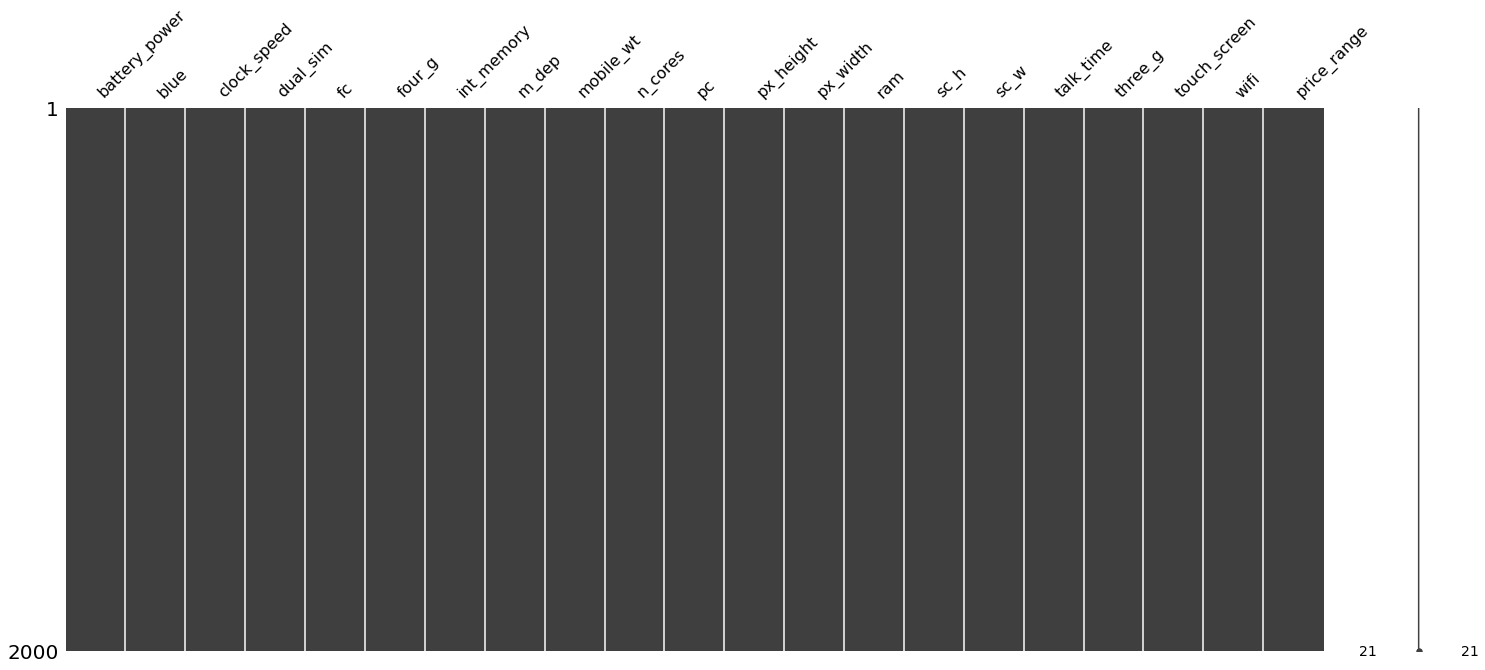

In [8]:
import missingno as msno

msno.matrix(df)

#Correlation matrix

In [9]:
correl = df.corr()
correl

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011113,-0.041847,0.033334,0.015665,-0.004004,0.023847,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.013277,0.035198,0.003593,0.013443,0.041177,0.042540,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011113,0.013277,1.000000,-0.014762,0.003935,-0.033247,0.007011,-0.008068,0.003349,0.014090,-0.008937,-0.004256,0.000046,0.015202,-0.019511,-0.002766,-0.004805,-0.034722,0.022139,-0.022822,0.006837
dual_sim,-0.041847,0.035198,-0.014762,1.000000,-0.029123,0.003187,-0.015679,-0.000031,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,0.003935,-0.029123,1.000000,-0.016560,-0.029133,0.030951,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.033247,0.003187,-0.016560,1.000000,0.008690,-0.014650,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.007011,-0.015679,-0.029133,0.008690,1.000000,0.005176,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.023847,0.042540,-0.008068,-0.000031,0.030951,-0.014650,0.005176,1.000000,0.002056,0.031055,0.027554,-0.025239,-0.034382,0.007241,-0.034169,-0.012453,-0.014776,0.001472,0.034290,0.001152,0.001996
mobile_wt,0.001844,-0.008605,0.003349,-0.008979,0.023618,-0.016537,-0.034214,0.002056,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,0.014090,-0.024658,-0.013356,-0.029706,-0.028310,0.031055,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


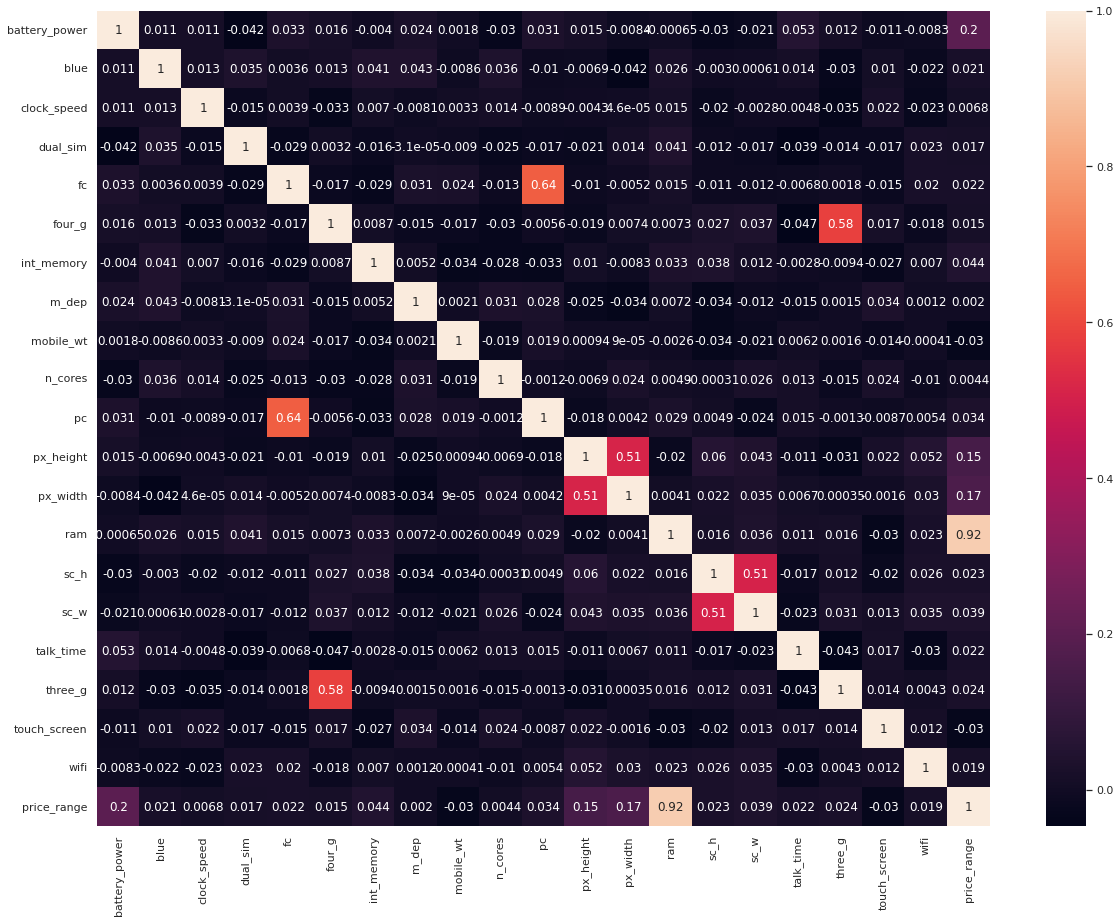

In [10]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(df.corr(),annot=True)



ram and price range  having 0.92 correlation .Other features are also having the slightly less correlation. 3g and 4g having 0.58 correlation values. sc_h and sc_w also having correlation of 0.51.Pcc and fc also have correlation of 0.64.Features are good positive correlation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


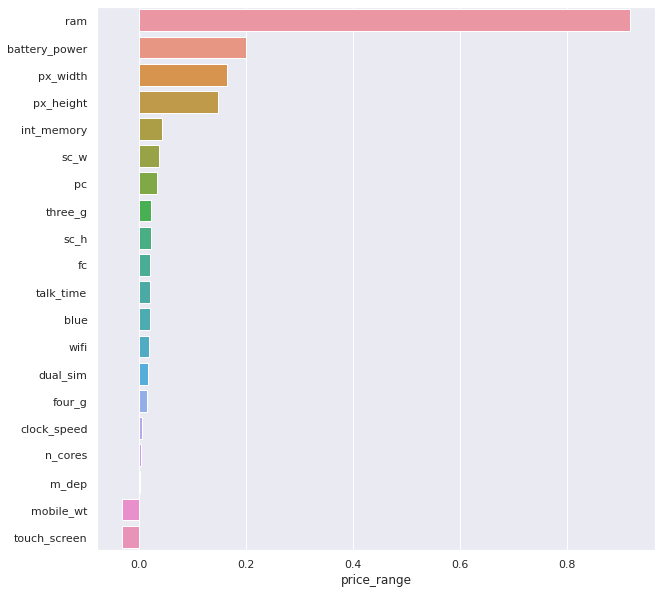

In [11]:
sns.set(rc = {'figure.figsize':(10,10)})
correlation = correl['price_range'].sort_values(ascending = False)
corrpric = correlation[1:]
sns.barplot(corrpric,corrpric.index)

this graph will helps to see the strong correlated features easily. certain feature which have negative features may be omitted based on model performance

#Data visualisation

data exploration on features dual_sim, fc, four_g, three_g, wifi and touch screen

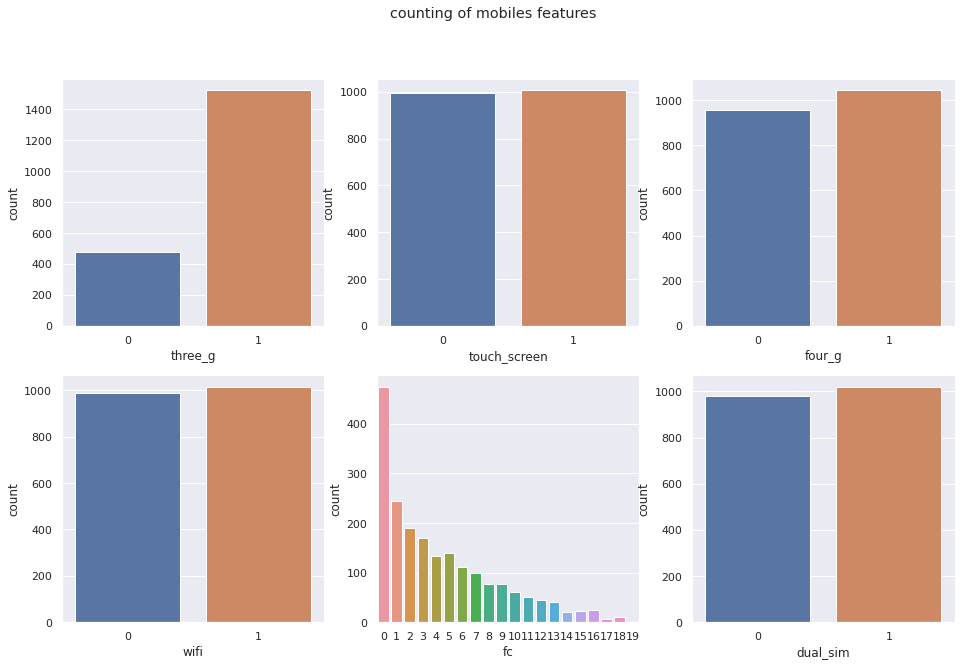

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig .suptitle("counting of mobiles features")
sns.countplot(ax=axes[0, 0], data=df, x='three_g')
sns.countplot(ax=axes[0, 1], data=df, x='touch_screen')
sns.countplot(ax=axes[0, 2], data=df, x='four_g')
sns.countplot(ax=axes[1,0], data=df, x='wifi')
sns.countplot(ax=axes[1,1],data = df, x ='fc' )
sns.countplot(ax=axes[1,2],data = df, x ='dual_sim' )

plt.show()

Mostly all mobiles supports threeg facilities and both touch mobiles and normal mobiles are available in equal proportion. More number of mobiles have 4g facility. Mobile has wifi and not having wifi has equal quantity, same for dual sim.

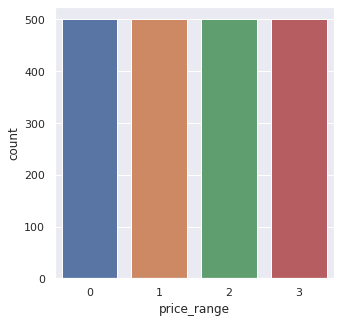

In [13]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(data = df, x ='price_range' )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

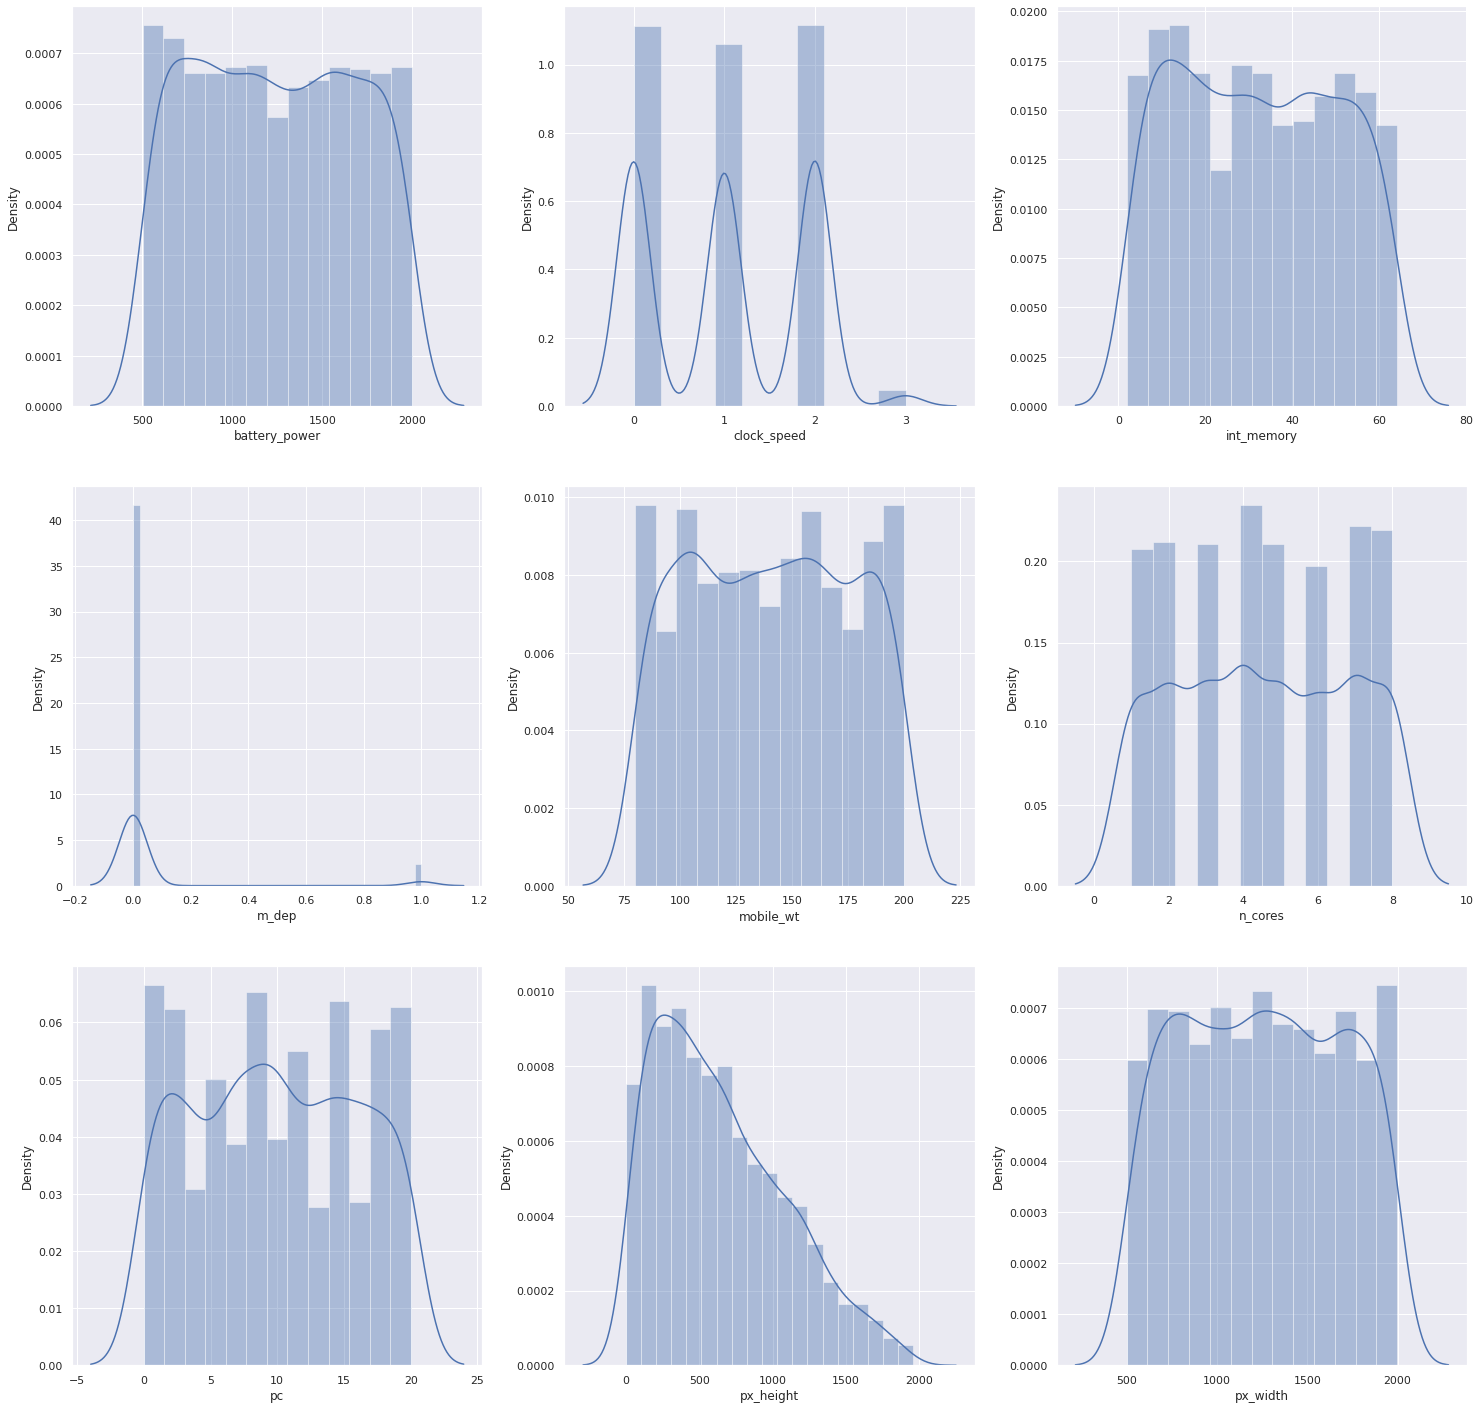

In [14]:
hist_plot = ["battery_power","clock_speed","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width",
            "ram","sc_h","sc_w","talk_time","price_range"]

fig,ax = plt.subplots(3,3, figsize = (25,25) )

for i,j in zip(hist_plot,ax.flatten()):
    sns.distplot(df[i],ax = j)
plt.show()

##Outlier detection

Outliers are checked for continous features in the dataset.

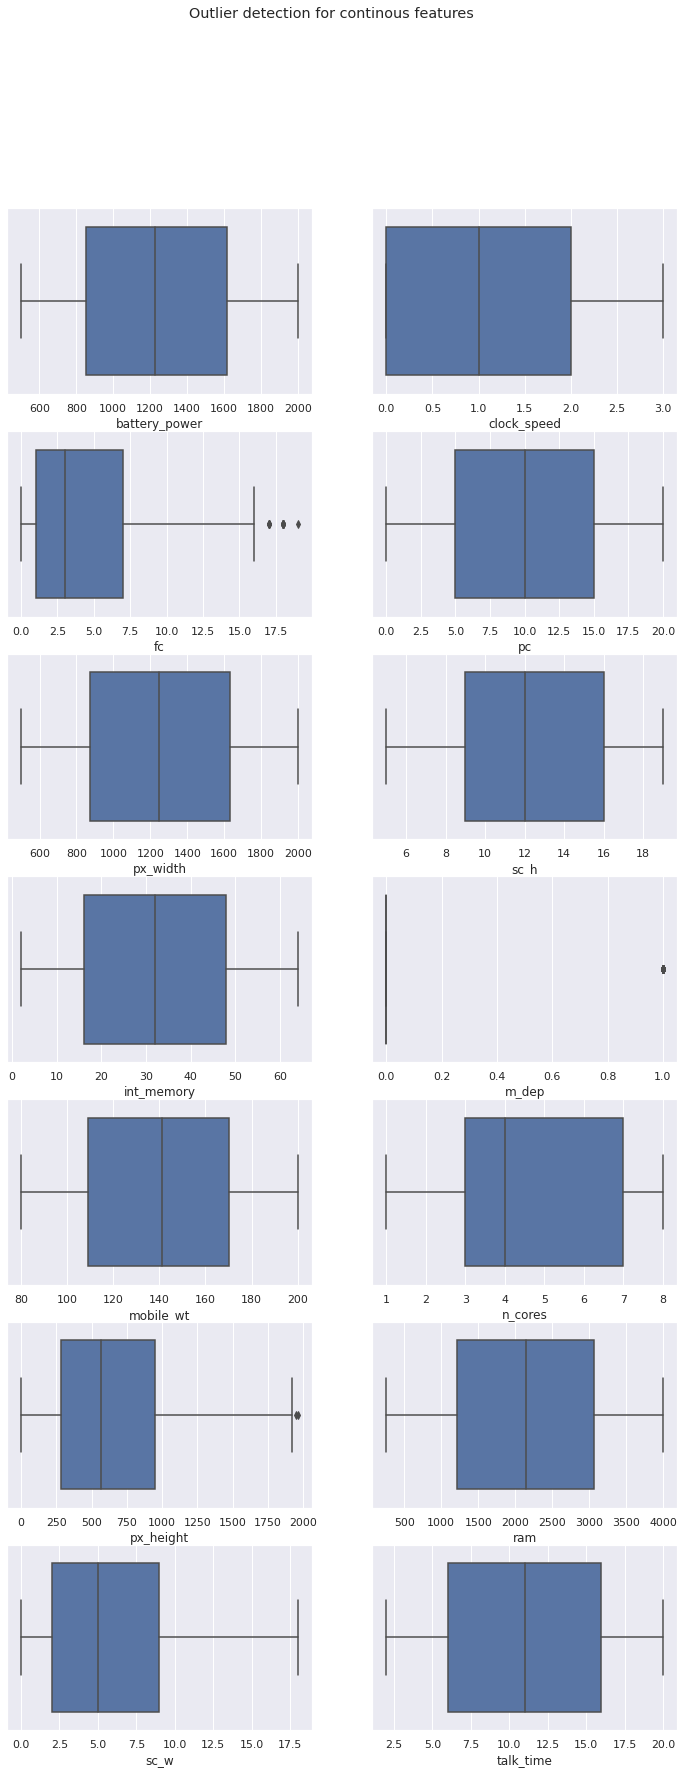

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28))
fig .suptitle("Outlier detection for continous features")
sns.boxplot(x=df['battery_power'],ax=ax[0,0])
sns.boxplot(x=df['clock_speed'],ax=ax[0,1])
sns.boxplot(x=df['fc'],ax=ax[1,0])
sns.boxplot(x=df['pc'],ax=ax[1,1])
sns.boxplot(x=df['px_width'],ax=ax[2,0])
sns.boxplot(x=df['sc_h'],ax=ax[2,1])
sns.boxplot(x=df['int_memory'],ax=ax[3,0])
sns.boxplot(x=df['m_dep'],ax=ax[3,1])
sns.boxplot(x=df['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=df['n_cores'],ax=ax[4,1])
sns.boxplot(x=df['px_height'],ax=ax[5,0])
sns.boxplot(x=df['ram'],ax=ax[5,1])
sns.boxplot(x=df['sc_w'],ax=ax[6,0])
sns.boxplot(x=df['talk_time'],ax=ax[6,1])
plt.show()

there are few outliers in the dataset which are not considered here as outliers 

To check the distribution of plot and relationship of dataset we are plotting the pairplot.

#importing the test data

In [16]:
df2 = pd.read_csv('mobiles test.csv')

#Splitting data

In [17]:
x = df.drop(columns = 'price_range').values
y = df.iloc[: , -1:].values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [19]:
x_train

array([[1232,    0,    2, ...,    1,    0,    0],
       [1840,    0,    0, ...,    0,    0,    0],
       [1692,    0,    2, ...,    1,    1,    1],
       ...,
       [1190,    0,    2, ...,    0,    0,    1],
       [1191,    0,    2, ...,    1,    1,    1],
       [ 706,    0,    0, ...,    1,    0,    1]])

##feature scaling

In [21]:

from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit_transform(x_train,y_train)

array([[-1.60788581e-03, -9.65591606e-01,  1.12260512e+00, ...,
         5.64839529e-01, -9.86343245e-01, -1.02532046e+00],
       [ 1.37407489e+00, -9.65591606e-01, -1.22532716e+00, ...,
        -1.77041434e+00, -9.86343245e-01, -1.02532046e+00],
       [ 1.03920474e+00, -9.65591606e-01,  1.12260512e+00, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       ...,
       [-9.66386040e-02, -9.65591606e-01,  1.12260512e+00, ...,
        -1.77041434e+00, -9.86343245e-01,  9.75304830e-01],
       [-9.43759679e-02, -9.65591606e-01,  1.12260512e+00, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       [-1.19175450e+00, -9.65591606e-01, -1.22532716e+00, ...,
         5.64839529e-01, -9.86343245e-01,  9.75304830e-01]])

#Modelling

##Decision Tree

In [60]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=0,max_depth = 10)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.99625

In [62]:
y_pred = dt.predict(x_test)

In [56]:
dtc = confusion_matrix(y_test, y_pred)


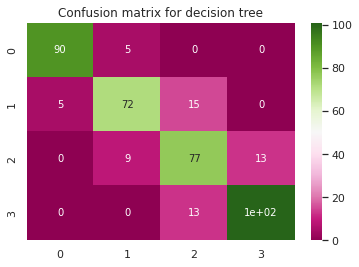

In [57]:
sns.heatmap(dtc, annot=True,cmap="PiYG")
plt.title("Confusion matrix for decision tree")
plt.show()

##Logitic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.64

In [27]:
y_pred = lr.predict(x_test)

In [31]:

lrc = confusion_matrix(y_test, y_pred)
lrc


array([[84, 10,  1,  0],
       [17, 51, 20,  4],
       [ 0, 28, 43, 28],
       [ 0,  2, 34, 78]])

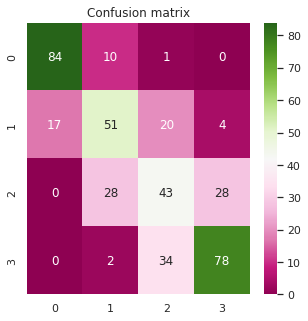

In [42]:

sns.heatmap(lrc, annot=True,cmap="PiYG")
plt.title("Confusion matrix")
plt.show()

##Random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(max_depth=10, random_state=0)
random.fit(x_train, y_train)
random.score(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.999375